In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import plotly.express as px

In [5]:
path=("/content/drive/MyDrive/Project/dataset.csv")

In [6]:
df=pd.read_csv(path)

In [7]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [8]:
df.columns


Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [9]:
df.columns = df.columns.str.replace(" ", "_")


In [10]:
df.columns


Index(['VIN_(1-10)', 'County', 'City', 'State', 'Postal_Code', 'Model_Year',
       'Make', 'Model', 'Electric_Vehicle_Type',
       'Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility', 'Electric_Range',
       'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract'],
      dtype='object')

In [11]:
df.columns = df.columns.str.strip().str.lower()


In [12]:
df.columns

Index(['vin_(1-10)', 'county', 'city', 'state', 'postal_code', 'model_year',
       'make', 'model', 'electric_vehicle_type',
       'clean_alternative_fuel_vehicle_(cafv)_eligibility', 'electric_range',
       'base_msrp', 'legislative_district', 'dol_vehicle_id',
       'vehicle_location', 'electric_utility', '2020_census_tract'],
      dtype='object')

In [13]:
df.head()

,vin_(1-10),county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_(cafv)_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,2020_census_tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [14]:
df.shape

(112634, 17)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   vin_(1-10)                                         112634 non-null  object 
 1   county                                             112634 non-null  object 
 2   city                                               112634 non-null  object 
 3   state                                              112634 non-null  object 
 4   postal_code                                        112634 non-null  int64  
 5   model_year                                         112634 non-null  int64  
 6   make                                               112634 non-null  object 
 7   model                                              112614 non-null  object 
 8   electric_vehicle_type                              112634 non-null  object

In [19]:
df.isnull().sum()

,0
vin_(1-10),0
county,0
city,0
state,0
postal_code,0
model_year,0
make,0
model,20
electric_vehicle_type,0
clean_alternative_fuel_vehicle_(cafv)_eligibility,0


In [21]:
df.model.value_counts().head()

,count
model,
MODEL 3,23135
MODEL Y,17142
LEAF,12880
MODEL S,7377
BOLT EV,4910


In [22]:
df.legislative_district.value_counts()[:3].reset_index().head()


<ipython-input-22-982dcb64f2ca>:1: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  df.legislative_district.value_counts()[:3].reset_index().head()


,legislative_district,count
0,41.0,7605
1,45.0,7112
2,48.0,6462
3,36.0,5251
4,46.0,4723


In [24]:
print(df.describe())

         postal_code     model_year  electric_range      base_msrp  \
count  112634.000000  112634.000000   112634.000000  112634.000000   
mean    98156.226850    2019.003365       87.812987    1793.439681   
std      2648.733064       2.892364      102.334216   10783.753486   
min      1730.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2017.000000        0.000000       0.000000   
50%     98119.000000    2020.000000       32.000000       0.000000   
75%     98370.000000    2022.000000      208.000000       0.000000   
max     99701.000000    2023.000000      337.000000  845000.000000   

       legislative_district  dol_vehicle_id  2020_census_tract  
count         112348.000000    1.126340e+05       1.126340e+05  
mean              29.805604    1.994567e+08       5.296650e+10  
std               14.700545    9.398427e+07       1.699104e+09  
min                1.000000    4.777000e+03       1.101001e+09  
25%               18.000000    1.484142e+08 

In [25]:
categorical_columns = df.select_dtypes(include=['object']).columns


In [26]:
for col in categorical_columns:
    print(f"\nValue counts for column: {col}")
    print(df[col].value_counts())


Value counts for column: vin_(1-10)
vin_(1-10)
5YJYGDEE9M    472
5YJYGDEE0M    465
5YJYGDEE8M    448
5YJYGDEE7M    448
5YJYGDEE2M    437
             ... 
WA1LAAGE9M      1
5UXKT0C50H      1
5YJYGAED3M      1
WDC0G5DBXL      1
YV4ED3GM0P      1
Name: count, Length: 7548, dtype: int64

Value counts for column: county
county
King          59000
Snohomish     12434
Pierce         8535
Clark          6689
Thurston       4126
              ...  
Pinal             1
Elmore            1
Portsmouth        1
Kings             1
Kootenai          1
Name: count, Length: 165, dtype: int64

Value counts for column: city
city
Seattle         20305
Bellevue         5921
Redmond          4201
Vancouver        4013
Kirkland         3598
                ...  
Hartline            1
Gaithersburg        1
El Paso             1
Klickitat           1
Worley              1
Name: count, Length: 629, dtype: int64

Value counts for column: state
state
WA    112348
CA        76
VA        36
MD        26
TX      

<Axes: ylabel='Frequency'>

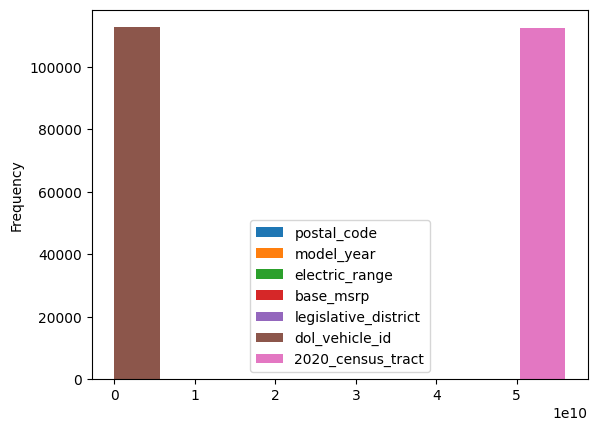

In [27]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

df[numerical_columns].plot(kind="hist")

In [45]:
Missing_columns=["Model","Legislative District","2020 Census Tract"]


In [46]:
SIM=SimpleImputer(strategy="most_frequent")
SIM


SimpleImputer(strategy='most_frequent')

KeyError: "None of [Index(['Model'], dtype='object')] are in the [columns]"

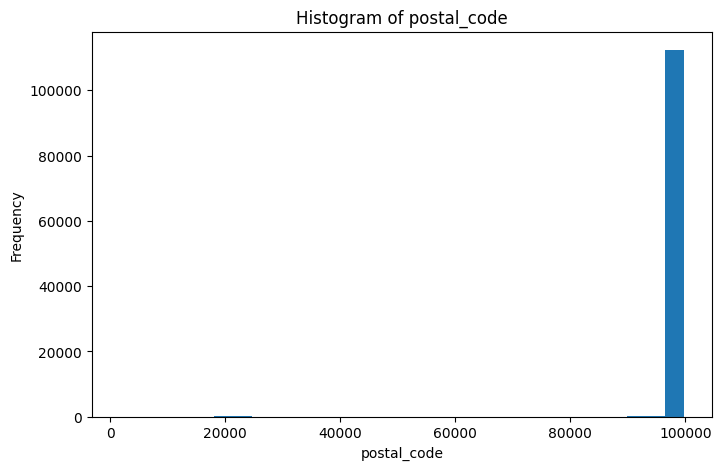

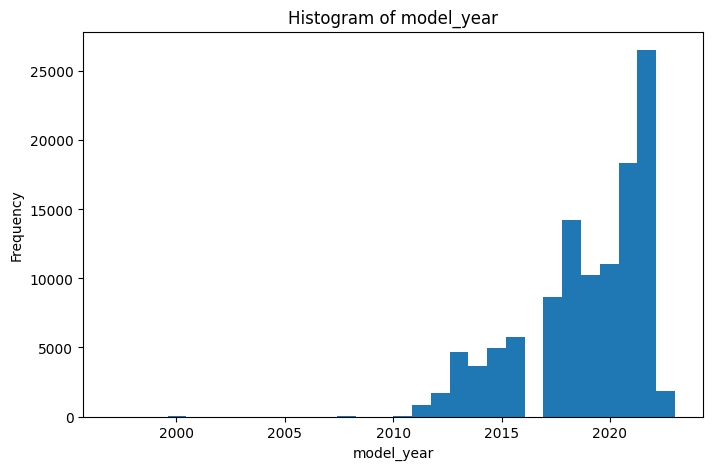

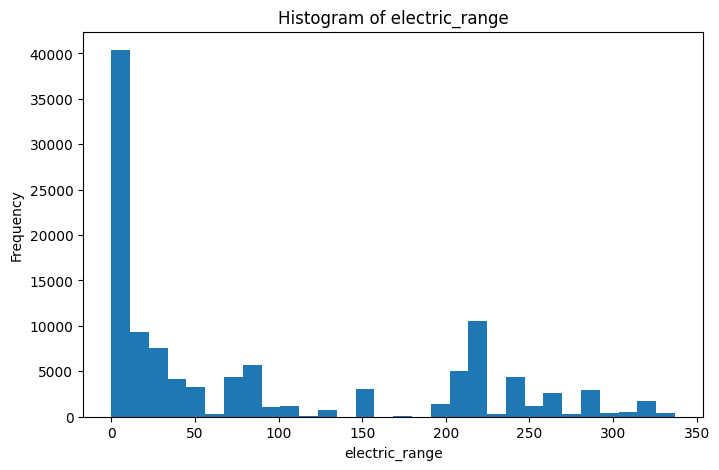

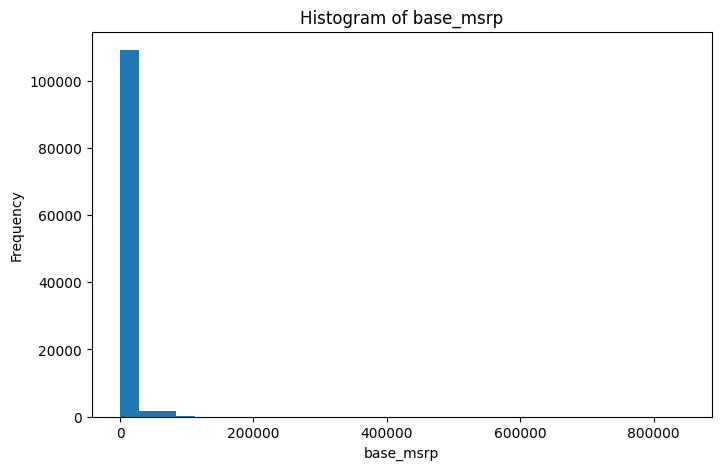

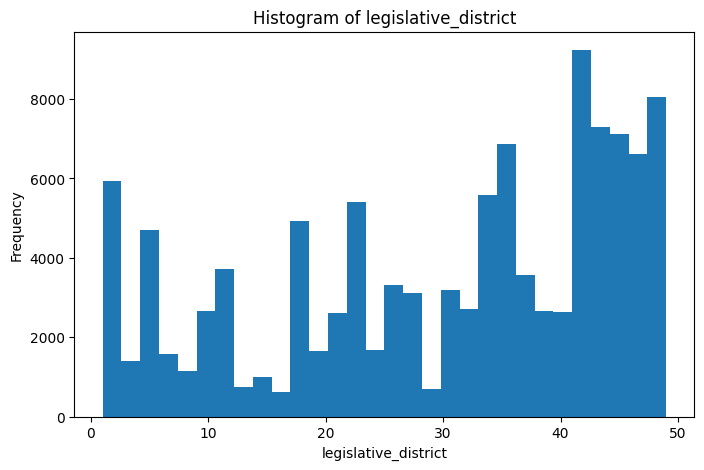

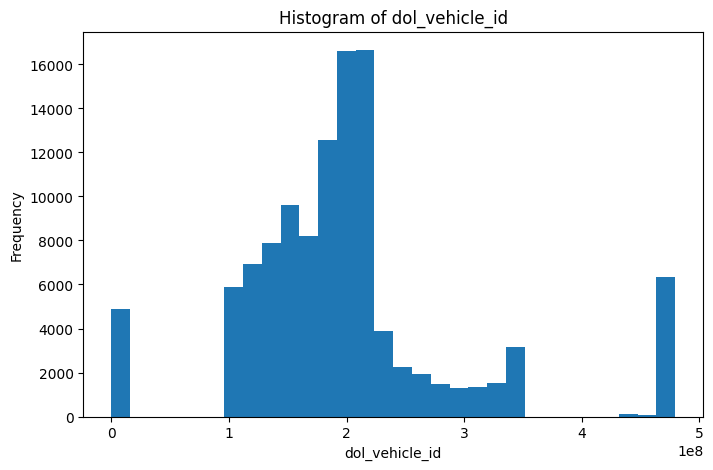

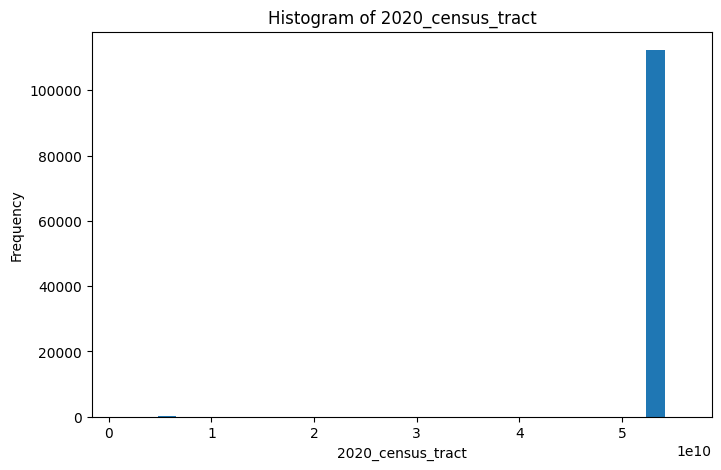

In [28]:
for col in numerical_columns:
    df[col].plot(kind='hist', bins=30, title=f'Histogram of {col}', figsize=(8, 5))
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

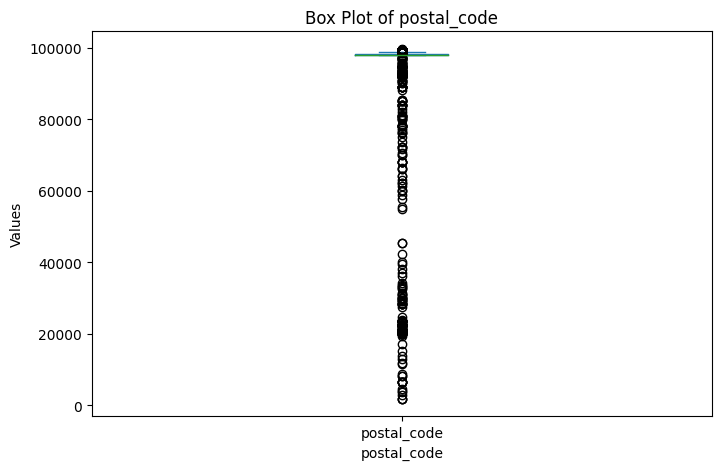

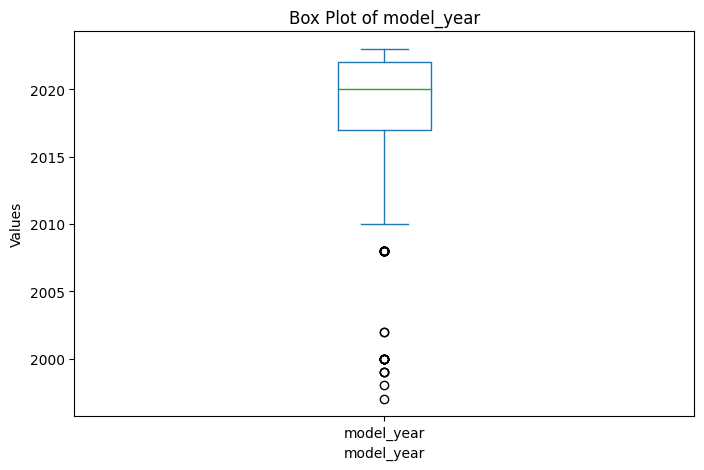

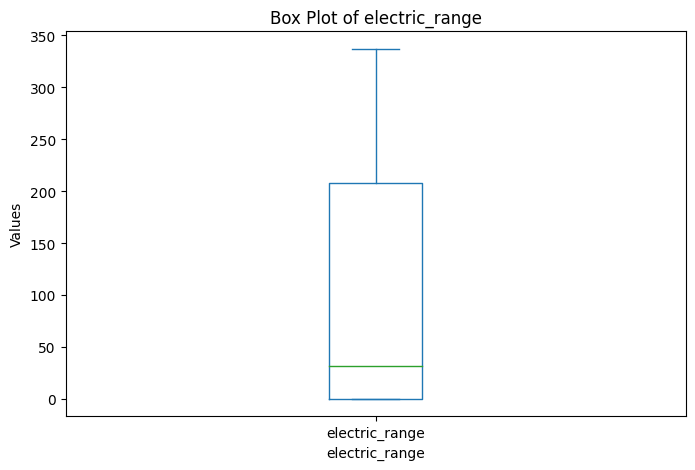

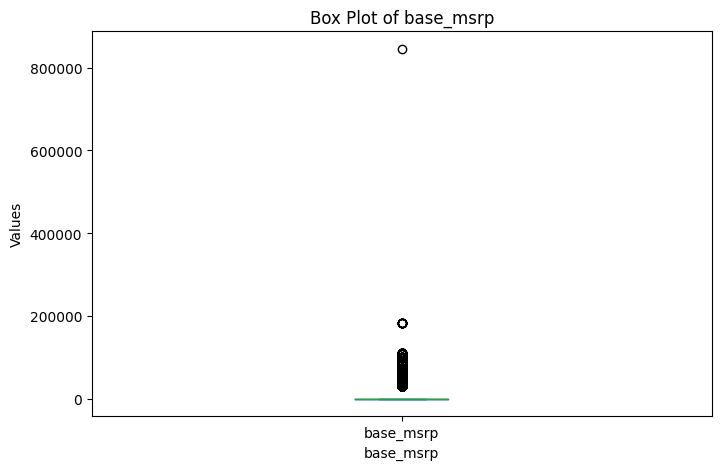

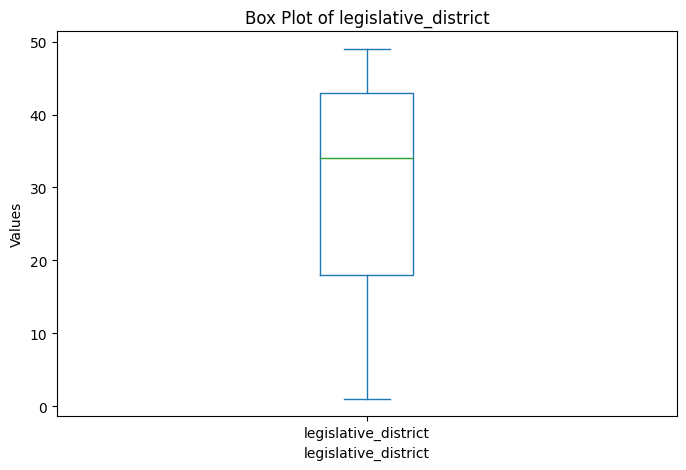

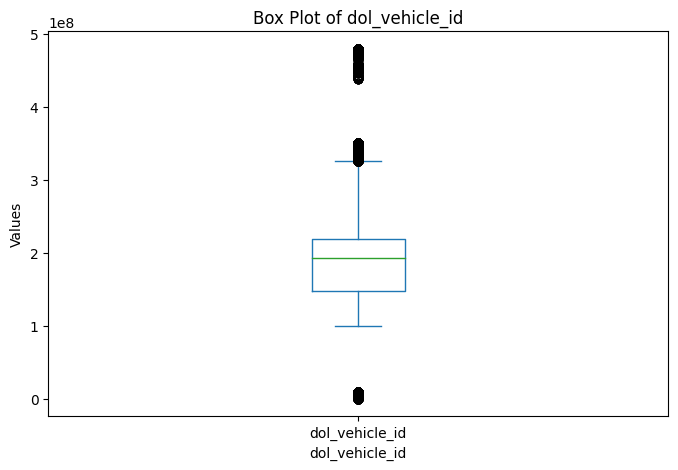

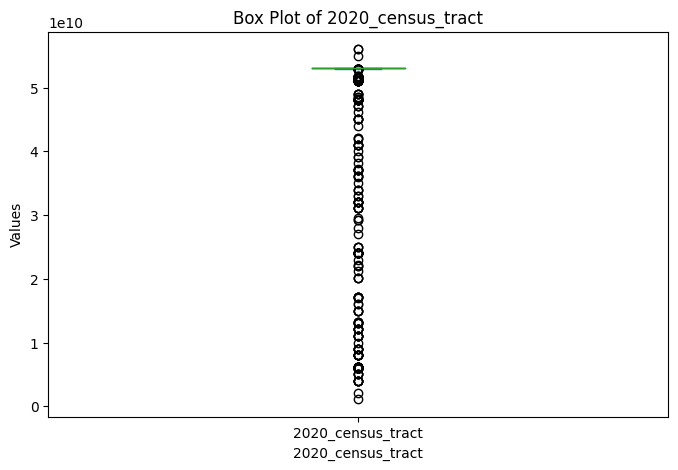

In [41]:
for col in numerical_columns:
    df[col].plot(kind='box', title=f'Box Plot of {col}', figsize=(8, 5))
    plt.xlabel(col)
    plt.ylabel('Values')
    plt.show()

# **Bivariate Analysis using Pandas**


In [51]:
df.columns


Index(['vin_(1-10)', 'county', 'city', 'state', 'postal_code', 'model_year',
       'make', 'model', 'electric_vehicle_type',
       'clean_alternative_fuel_vehicle_(cafv)_eligibility', 'electric_range',
       'base_msrp', 'legislative_district', 'dol_vehicle_id',
       'vehicle_location', 'electric_utility', '2020_census_tract'],
      dtype='object')

In [53]:
correlation_matrix = df[numerical_columns].corr()


In [54]:
correlation_matrix

,postal_code,model_year,electric_range,base_msrp,legislative_district,dol_vehicle_id,2020_census_tract
postal_code,1.000000,-0.004485,0.000385,0.001151,-0.433405,0.003365,0.501170
model_year,-0.004485,1.000000,-0.288433,-0.229130,0.010439,-0.068295,0.000714
electric_range,0.000385,-0.288433,1.000000,0.085025,0.024387,0.009682,0.000722
base_msrp,0.001151,-0.229130,0.085025,1.000000,0.012426,0.000504,0.000979
legislative_district,-0.433405,0.010439,0.024387,0.012426,1.000000,-0.001671,-0.111991
dol_vehicle_id,0.003365,-0.068295,0.009682,0.000504,-0.001671,1.000000,0.002754
2020_census_tract,0.501170,0.000714,0.000722,0.000979,-0.111991,0.002754,1.000000


In [56]:
correlation_matrix_style = correlation_matrix.style.background_gradient(cmap='coolwarm').format(precision=2)
correlation_matrix_style

,postal_code,model_year,electric_range,base_msrp,legislative_district,dol_vehicle_id,2020_census_tract
postal_code,1.00,-0.00,0.00,0.00,-0.43,0.00,0.50
model_year,-0.00,1.00,-0.29,-0.23,0.01,-0.07,0.00
electric_range,0.00,-0.29,1.00,0.09,0.02,0.01,0.00
base_msrp,0.00,-0.23,0.09,1.00,0.01,0.00,0.00
legislative_district,-0.43,0.01,0.02,0.01,1.00,-0.00,-0.11
dol_vehicle_id,0.00,-0.07,0.01,0.00,-0.00,1.00,0.00
2020_census_tract,0.50,0.00,0.00,0.00,-0.11,0.00,1.00


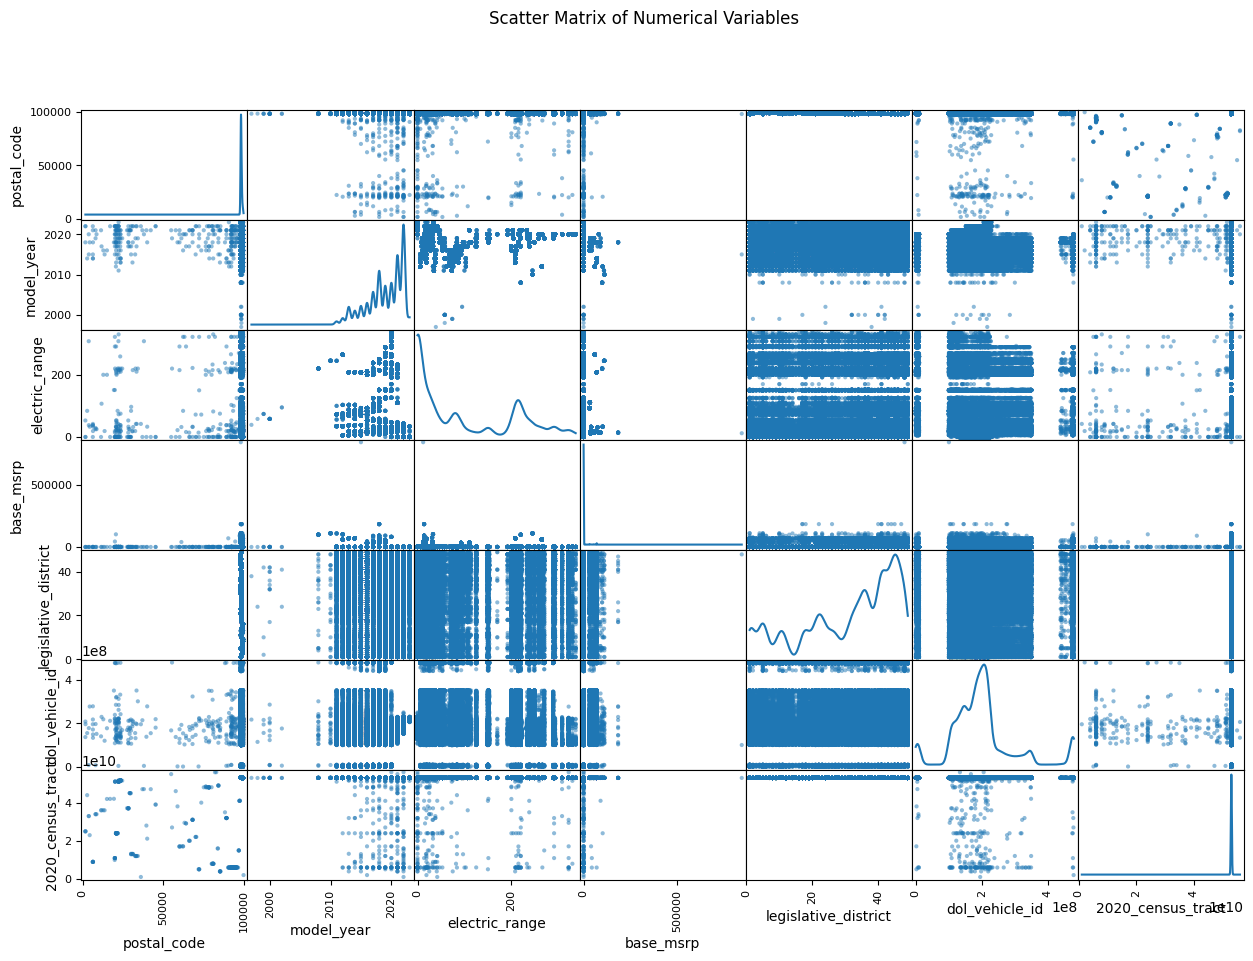

In [58]:
pd.plotting.scatter_matrix(df[numerical_columns], figsize=(15, 10), diagonal='kde')
plt.suptitle('Scatter Matrix of Numerical Variables')
plt.show()

In [60]:
categorical_columns = df.select_dtypes(include=['object']).columns


In [64]:
grouped_means = {}
for cat_col in categorical_columns:
    print(f"\nAnalysis for Categorical Column: {cat_col}")
    grouped_means[cat_col] = {}
    for num_col in numerical_columns:
        grouped_data = df.groupby(cat_col)[num_col].mean()
        grouped_means[cat_col][num_col] = grouped_data
        print(f"\nMean {num_col} across {cat_col} categories:\n", grouped_data)


Analysis for Categorical Column: vin_(1-10)

Mean postal_code across vin_(1-10) categories:
 vin_(1-10)
1C4JJXP60M    98422.294118
1C4JJXP60N    98291.346154
1C4JJXP61M    96410.377778
1C4JJXP61N    98361.454545
1C4JJXP62M    98311.666667
                  ...     
YV4H60DZ5N    98202.600000
YV4H60DZ6N    98150.000000
YV4H60DZ7N    98226.428571
YV4H60DZ8N    98189.400000
YV4H60DZ9N    98078.500000
Name: postal_code, Length: 7548, dtype: float64

Mean model_year across vin_(1-10) categories:
 vin_(1-10)
1C4JJXP60M    2021.0
1C4JJXP60N    2022.0
1C4JJXP61M    2021.0
1C4JJXP61N    2022.0
1C4JJXP62M    2021.0
               ...  
YV4H60DZ5N    2022.0
YV4H60DZ6N    2022.0
YV4H60DZ7N    2022.0
YV4H60DZ8N    2022.0
YV4H60DZ9N    2022.0
Name: model_year, Length: 7548, dtype: float64

Mean electric_range across vin_(1-10) categories:
 vin_(1-10)
1C4JJXP60M    25.0
1C4JJXP60N    21.0
1C4JJXP61M    25.0
1C4JJXP61N    21.0
1C4JJXP62M    25.0
              ... 
YV4H60DZ5N    35.0
YV4H60DZ6N    35.

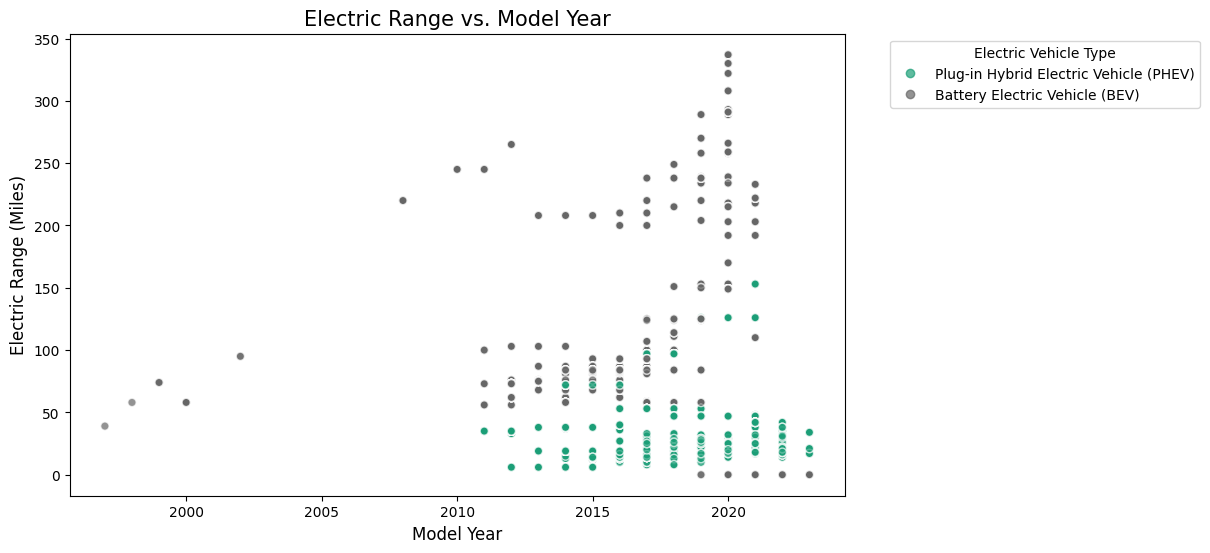

In [66]:

plt.figure(figsize=(10, 6))

df['type_code'] = pd.factorize(df['electric_vehicle_type'])[0]

scatter = plt.scatter(x=df['model_year'],
                      y=df['electric_range'],
                      c=df['type_code'],  # Categorical variable converted to numeric
                      cmap='Dark2',  # Color map for the scatter points
                      alpha=0.7,  # Transparency of points
                      edgecolors='w')  # White edges for points

plt.title('Electric Range vs. Model Year', fontsize=15)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Electric Range (Miles)', fontsize=12)

handles, labels = scatter.legend_elements()
plt.legend(handles, df['electric_vehicle_type'].unique(), title='Electric Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


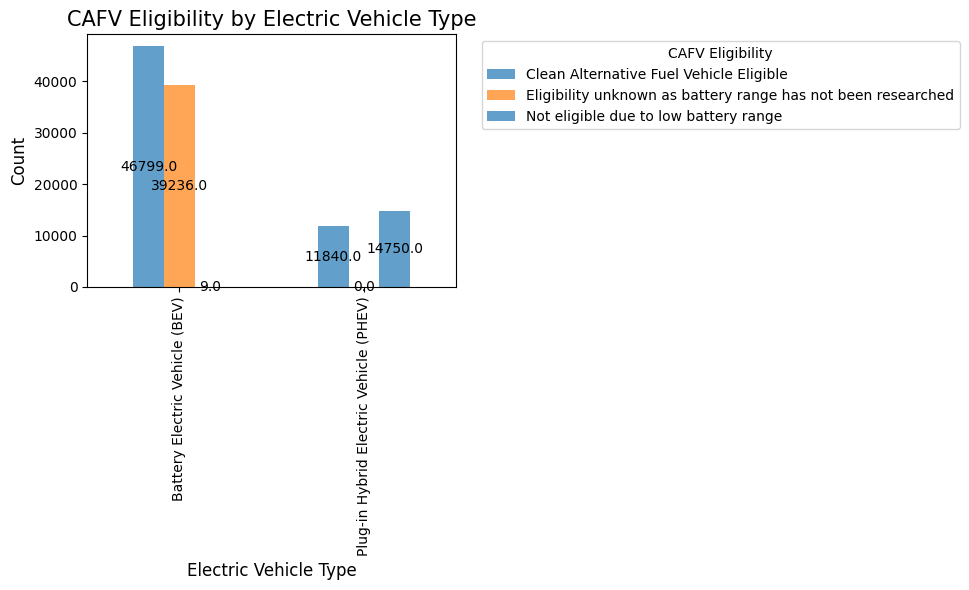

In [67]:

count_data = df.groupby(['electric_vehicle_type', 'clean_alternative_fuel_vehicle_(cafv)_eligibility']).size().unstack(fill_value=0)

ax = count_data.plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e'], alpha=0.7)  # Specify colors for different hues

for container in ax.containers:
    ax.bar_label(container, fmt='{}', label_type='center', fontsize=10)

plt.title('CAFV Eligibility by Electric Vehicle Type', fontsize=15)
plt.xlabel('Electric Vehicle Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.legend(title='CAFV Eligibility', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [71]:
import matplotlib.pyplot as plt


TypeError: 'Axes' object is not subscriptable

<Figure size 1800x600 with 0 Axes>

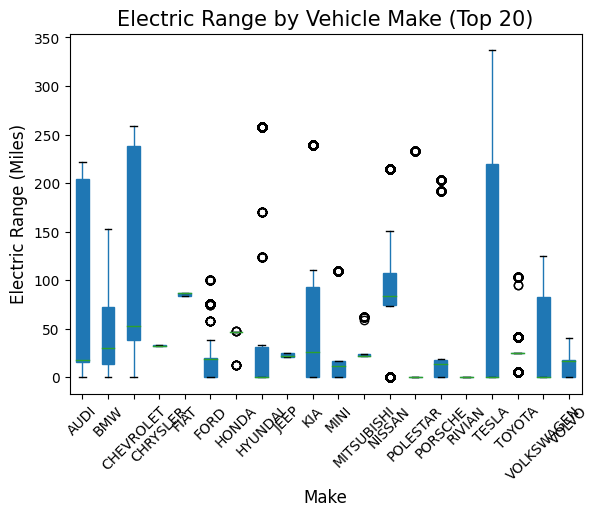

In [72]:
top_makes = df['make'].value_counts().nlargest(20).index

filtered_df = df[df['make'].isin(top_makes)]

plt.figure(figsize=(18, 6))

ax = filtered_df.boxplot(column='electric_range', by='make', grid=False, patch_artist=True)

plt.title('Electric Range by Vehicle Make (Top 20)', fontsize=15)
plt.suptitle('')
plt.xlabel('Make', fontsize=12)
plt.ylabel('Electric Range (Miles)', fontsize=12)
plt.xticks(rotation=45)
for i, box in enumerate(ax['electric_range']):
    median = round(filtered_df[filtered_df['make'] == top_makes[i]]['electric_range'].median(), 2)
    plt.text(i + 1, median + 10, f'{median}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

TypeError: 'Axes' object is not subscriptable

<Figure size 1200x600 with 0 Axes>

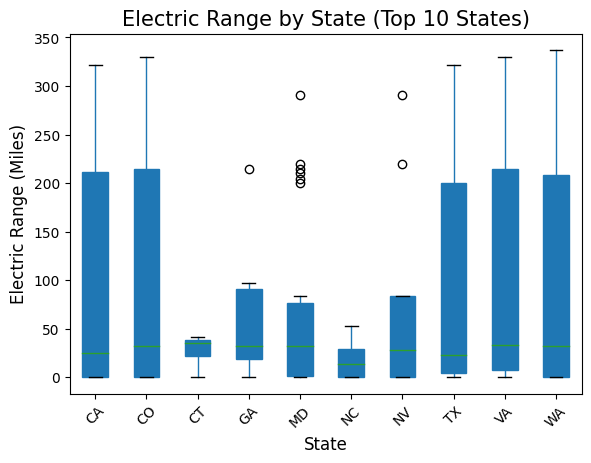

In [74]:
top_states = df['state'].value_counts().nlargest(10).index

filtered_df = df[df['state'].isin(top_states)]

plt.figure(figsize=(12, 6))

ax = filtered_df.boxplot(column='electric_range', by='state', grid=False, patch_artist=True)

plt.title('Electric Range by State (Top 10 States)', fontsize=15)
plt.suptitle('')
plt.xlabel('State', fontsize=12)
plt.ylabel('Electric Range (Miles)', fontsize=12)
plt.xticks(rotation=45)

for i, box in enumerate(ax['electric_range']):
    median = round(filtered_df[filtered_df['state'] == top_states[i]]['electric_range'].median(), 2)
    plt.text(i + 1, median + 10, f'{median}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# **Task 2**

In [75]:
import plotly.express as px



In [81]:
ev_count_by_state = df.groupby('state').size().reset_index(name='ev_count')

fig = px.choropleth(
    ev_count_by_state,
    locations='state',
    locationmode="USA-states",
    color='ev_count',
    color_continuous_scale='Blues',
    scope="usa",
    labels={'ev_count': 'Number of EVs'},
    title='Number of Electric Vehicles by State',
    hover_name='state',
    hover_data={'ev_count': True},
)

fig.update_layout(
    geo=dict(bgcolor='rgba(0,0,0,0)'),
    title_x=0.5,
    coloraxis_colorbar=dict(
        title='Number of EVs',
        thickness=15,
        tickfont=dict(size=12),
        titlefont=dict(size=14),
        lenmode="pixels",
        len=300,
        yanchor="middle",
        y=0.5,
        xanchor="left",
        x=1.02,
    ),
)

fig.update_traces(
    hovertemplate='<b>%{hovertext}</b><br>Number of EVs: %{z}<extra></extra>',
    marker=dict(line=dict(width=0.5, color='darkgray'))
)
fig.show()

# **Task 3**

In [82]:
import plotly.express as px
ev_counts = df.groupby(['make', 'model_year']).size().reset_index(name='count')

fig = px.bar(
    ev_counts,
    x='count',
    y='make',
    color='make',
    orientation='h',
    animation_frame='model_year',
    range_x=[0, ev_counts['count'].max() + 10],
    title='Count of Electric Vehicles by Make Each Year',
    labels={'count': 'Number of EVs'},
    height=600
)

fig.update_layout(
    yaxis=dict(title='Make'),
    xaxis=dict(title='Number of EVs'),
    showlegend=False,
)

fig.show()

In [87]:

# Check if the required columns exist in the DataFrame
if 'make' in df.columns and 'model_year' in df.columns:
    # Group by 'make' and 'model_year' to count the number of EVs
    ev_counts = df.groupby(['make', 'model_year']).size().reset_index(name='count')

    # Create a racing bar plot using Plotly Express
    fig = px.bar(
        ev_counts,
        x='count',             # The counts of EVs
        y='make',              # The vehicle makes
        color='make',          # Color bars by make
        orientation='h',       # Horizontal bars
        animation_frame='model_year',  # Animate by model year
        range_x=[0, ev_counts['count'].max() + 10],  # Set x-axis range
        title='Count of Electric Vehicles by Make Each Year',  # Title of the plot
        labels={'count': 'Number of EVs'},  # Label for the x-axis
        height=600  # Height of the plot
    )

    # Update layout for better aesthetics
    fig.update_layout(
        yaxis=dict(title='Make'),              # Title for y-axis
        xaxis=dict(title='Number of EVs'),     # Title for x-axis
        showlegend=False,                       # Hide legend for clarity
        title_x=0.5                            # Center the title
    )

    # Show the racing bar plot
    fig.show()
else:
    print("The dataset does not contain 'make' or 'model_year' columns.")


In [90]:

# Check if the required columns exist in the DataFrame
if 'make' in df.columns and 'model_year' in df.columns:
    # Group by 'make' and 'model_year' to count the number of EVs
    ev_counts = df.groupby(['make', 'model_year']).size().reset_index(name='count')

    # Create a racing bar plot using Plotly Express
    fig = px.bar(
        ev_counts,
        x='count',             # The counts of EVs
        y='make',              # The vehicle makes
        color='make',          # Color bars by make
        orientation='h',       # Horizontal bars
        animation_frame='model_year',  # Animate by model year
        range_x=[0, ev_counts['count'].max() + 10],  # Set x-axis range
        title='Count of Electric Vehicles by Make Each Year',  # Title of the plot
        labels={'count': 'Number of EVs'},  # Label for the x-axis
        height=600,           # Height of the plot
        width=1200            # Width of the plot (increased for wider view)
    )

    # Update layout for better aesthetics
    fig.update_layout(
        yaxis=dict(title='Make'),              # Title for y-axis
        xaxis=dict(title='Number of EVs'),     # Title for x-axis
        showlegend=False,                       # Hide legend for clarity
        title_x=0.5,                           # Center the title
        barmode='overlay',                     # Overlay bars for better visibility
    )

    # Show the racing bar plot
    fig.show()
else:
    print("The dataset does not contain 'make' or 'model_year' columns.")


# **Task 4**

In [ ]:
linkedIn :